# Advanced Model | CIFAKE


In [6]:
from keras.layers import Convolution2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [7]:
model_name = "advance_model_cifake"
dataset_base_path = "./datasets/CIFAKE"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [8]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

Model/history not found.


In [20]:
# Building model
if not model_history_loaded:
    classifier = build_sequential_model(
        layers=[
            Convolution2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
            MaxPooling2D(2,2),
            BatchNormalization(),

            Convolution2D(64, (3,3), activation="relu"),
            MaxPooling2D(2,2),
            BatchNormalization(),

            Convolution2D(128, (3,3), activation="relu"),
            MaxPooling2D(2,2),
            BatchNormalization(),

            GlobalAveragePooling2D(),

            Dense(1024,"relu"),
            BatchNormalization(),
            Dense(512,"relu"),
            BatchNormalization(),
            Dense(256,"relu"),
            BatchNormalization(),

            Dropout(0.2),         
            Dense(2,"softmax"),
        ]
    )

In [21]:
# Model summary
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_64 (Bat  (None, 15, 15, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

In [22]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [23]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/10
10000/10000 [==============================] - 806s 79ms/step - loss: 0.4678 - accuracy: 0.7817 - val_loss: 0.3158 - val_accuracy: 0.8688
Epoch 2/10
10000/10000 [==============================] - 76s 8ms/step - loss: 0.3968 - accuracy: 0.8232 - val_loss: 0.3471 - val_accuracy: 0.8590
Epoch 3/10
10000/10000 [==============================] - 75s 8ms/step - loss: 0.3746 - accuracy: 0.8361 - val_loss: 0.3520 - val_accuracy: 0.8418
Epoch 4/10
10000/10000 [==============================] - 77s 8ms/step - loss: 0.3644 - accuracy: 0.8447 - val_loss: 0.3714 - val_accuracy: 0.8350
Epoch 5/10
10000/10000 [==============================] - 76s 8ms/step - loss: 0.3501 - accuracy: 0.8503 - val_loss: 0.3867 - val_accuracy: 0.8203
Epoch 6/10
10000/10000 [==============================] - 77s 8ms/step - loss: 0.3470 - accuracy: 0.8522 - val_loss: 0.3313 - val_accuracy: 0.8494
Epoch 7/10
10000/10000 [==============================] - 79s 8ms/step - loss: 0.3370 - accuracy: 0.8589 - val_loss:

In [24]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/advance_model_cifake/model\assets


INFO:tensorflow:Assets written to: ./models/advance_model_cifake/model\assets


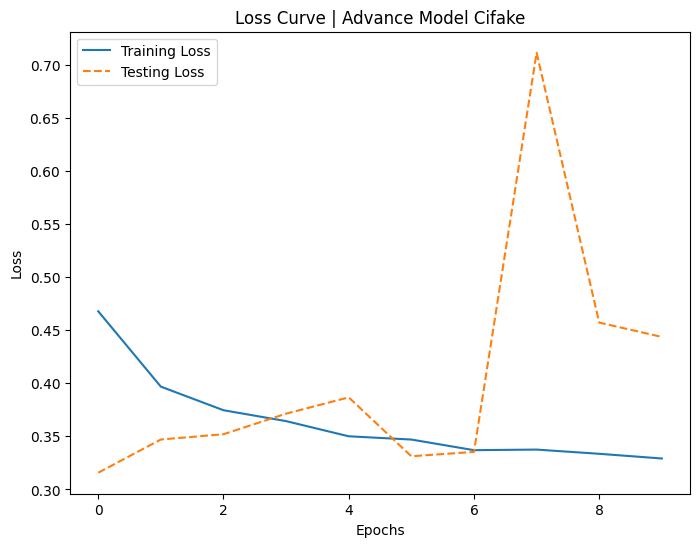

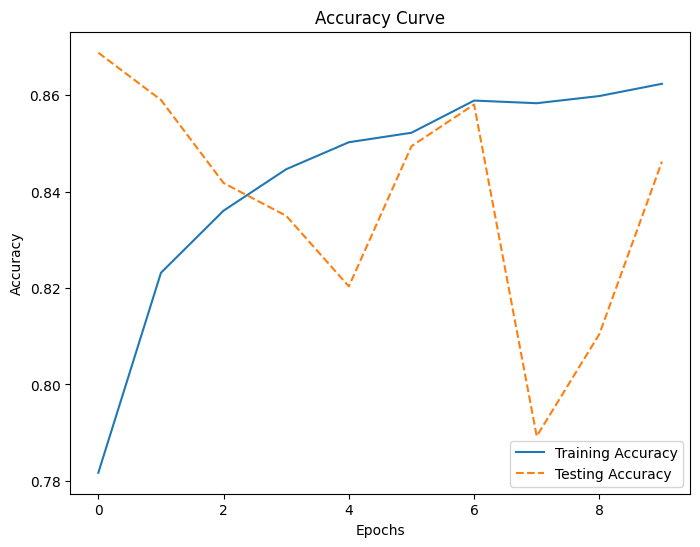

In [25]:
# Plot performance curves
plot_performance_curves(history, model_name)